<a href="https://colab.research.google.com/github/Venuram/Udacity-coursework/blob/main/Quora_question_pair_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Quora Question Pair Similarity - Udacity's Nanodegree Capestone Project

<h4> <b> 1. Project Overview: </b> </h4>

Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world. Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

This complete code is a walkthrough on solving one of the real world use cases i.e in our project it is <b> NLP (Natural Language Processing) </b> specific domain. 

This capstone project is using data provided by <b> kaggle </b> platform.

<h4> <b> Source </b> </h4> 

https://www.kaggle.com/c/quora-question-pairs/data

<b> 1.1 Data Overview: </b>

- Data will be in a file Train.csv
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate
- Size of Train.csv - 60MB
- Number of rows in Train.csv = 404,290


We are given a minimal number of data fields here, consisting of:

*   <b> id:</b>              Looks like a simple rowID

*   <b> qid{1, 2}:</b>       The unique ID of each question in the pair

*   <b> question{1, 2}: </b> The actual textual contents of the questions.

*   <b> is_duplicate:</b>    The label that we are trying to predict - whether the two questions are duplicates of each other.












<b> 1.2 Example Data point: </b>

"id","qid1","qid2","question1","question2","is_duplicate"

"0",
"1","2","What is the step by step guide to invest in share market in india?",

"What is the step by step guide to invest in share market?","0"

"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?",

"What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"

"7","15","16","How can I be a good geologist?",

"What should I do to be a great geologist?","1"

"11","23","24","How do I read and find my YouTube comments?",

"How can I see all my Youtube comments?","1"




<b> 2. Problem Statement: </b>



*   Identifying those questions asked are duplicates of questions that have already been asked. This instantly provide answers to questions that have already been answered. We are tasked with predicting whether a pair of questions are duplicates or not.

With the data mentioned above, the model built will try to justify the problem statement listed. This will be solved using binary classification supervised machine learning model, feeding the listed input data. I basically carry out exploratory data analysis to predict the pattern on how the data looks.

Later, inculcated few NLP techniques to process the sentences and tokens before feeding the data to the model. Also, performed feature engineering of introducing some fresh features that helps the model to predict better as far as the results are concerned. 

Lastly, I evaluate the working performance of the model and efficacy in classifying the duplicate questions. 


<b> 2.1 Type of Machine Leaning Problem: </b> 

*   It is a binary classification problem. 


<b> 2.2 Stratergy </b>

*   We build train and test datasets by randomly splitting in the ratio of 80:20 or 70:30 whatever we choose as we have sufficient points to work with. Fed the data to models validating the accuracy in classifying the inputs.


The expected solution would probably involve like for a given pair of questions we need to predict if they are duplicate or not. Whether its 0 or 1.

<b> 2.3 Performance Metric </b>

<u> 2.3.1 Metric(s): </u>

*   log-loss
*   Binary Confusion Matrix





<b> 2.4 Goal: </b>


The aim of this project is to address the problem statements and build an efficient model that identifies the similar questions posted. Adding to it, I have also  tried building other models like linear regressor and XGBoost to test the better working model in the given scenario.










In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
import sys
sys.path.append('path/to/module')

In [ ]:
sys.executable

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
# replace the id with id of file you want to access
df = drive.CreateFile({'id':'1kaiyKGUvYfEnZ9jckosLcLD0NO-K07Hz'}) 
df.GetContentFile('train.csv')

<h2> <b> 3. Data Exploration </b>

3.1 Importing libraries and functions used to analyze the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import gc
import plotly.offline as py
py.init_notebook_mode(connected=True)
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import plotly.tools as tls
import re
import warnings
warnings.filterwarnings("ignore")
!pip3 install fuzzywuzzy
from fuzzywuzzy import fuzz
from wordcloud import STOPWORDS, WordCloud

<b> 3.2  Reading data and understanding some basic information about the given data

In [8]:
# Reading the input train dataset
df = pd.read_csv('train.csv')
df.shape[0] # Shape of the dataframe
df.info() # Basic info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
# Lists out the top 5 rows of the dataset
df.head() 

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


<b> 3.3 Distribution of data points with respect to the 'is_duplicate' feature

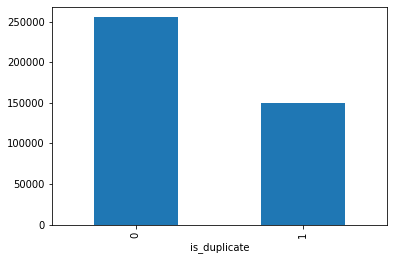

In [10]:
df.groupby("is_duplicate")['id'].count().plot.bar()

0 - Non-Duplicate

1 - Duplicate.

The above plot depicts the number of question pairs that are duplicate and non-duplicate. It is clearly evident that we have more non-similar questions in the forum.

In [11]:
print('Total number of question pairs for training:\n {}'.format(len(df)))

Total number of question pairs for training:
 404290


In [12]:
print('Percentage of question pairs that are not similar or belongs to class 0 {}'. format(100 - round(df['is_duplicate'].mean()*100,2)))
print('Percentage of question pairs that are similar or belongs to class 1 {}'. format(round(df['is_duplicate'].mean()*100,2)))

Percentage of question pairs that are not similar or belongs to class 0 63.08
Percentage of question pairs that are similar or belongs to class 1 36.92


<b> 3.4 No.of Unique Questions

In [13]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

uniq_qus = len(np.unique(qids))

print('No of unique questions {}'.format(uniq_qus))

qus_id_morethan_once = np.sum(qids.value_counts() > 1)

print('No of unique questions that appear more than once: {}'.format(qus_id_morethan_once))

print('Max no of times a single qus is repeated {}'.format(max(qids.value_counts())))

No of unique questions 537933
No of unique questions that appear more than once: 111780
Max no of times a single qus is repeated 157


*   We can see that the number of unique questions are more compared to the repeated ones and also the maximum times a particular question reciprocated is 157 times.



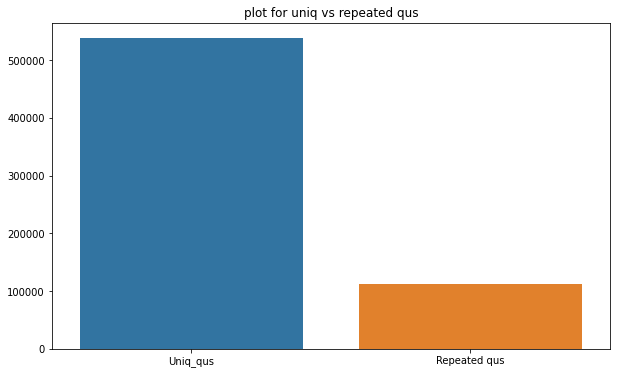

In [14]:
x = ['Uniq_qus', 'Repeated qus']
y = [uniq_qus, qus_id_morethan_once]

plt.figure(figsize=(10,6))
plt.title('plot for uniq vs repeated qus')
sns.barplot(x,y)
plt.show()

Plot represents the new features that we built for analysis point of view. 

i.e. Unique questions and Repeated Questions.

The bar chart illustrates that we have more than half a million unique questions posted in the quasi-forum website. But still we also have more than one lakh repeated questions to which there exists answers already. 

<b> 3.5 Checking duplicate pairs

In [15]:
#check whether there exist any duplicate pairs

pair_duplicate = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print("The number of duplicate question pair: {}". format((pair_duplicate).shape[0] - df.shape[0]))

The number of duplicate question pair: 0


<b> 3.6. No of occurences of each question

Max no of times a single qus is repeated 157


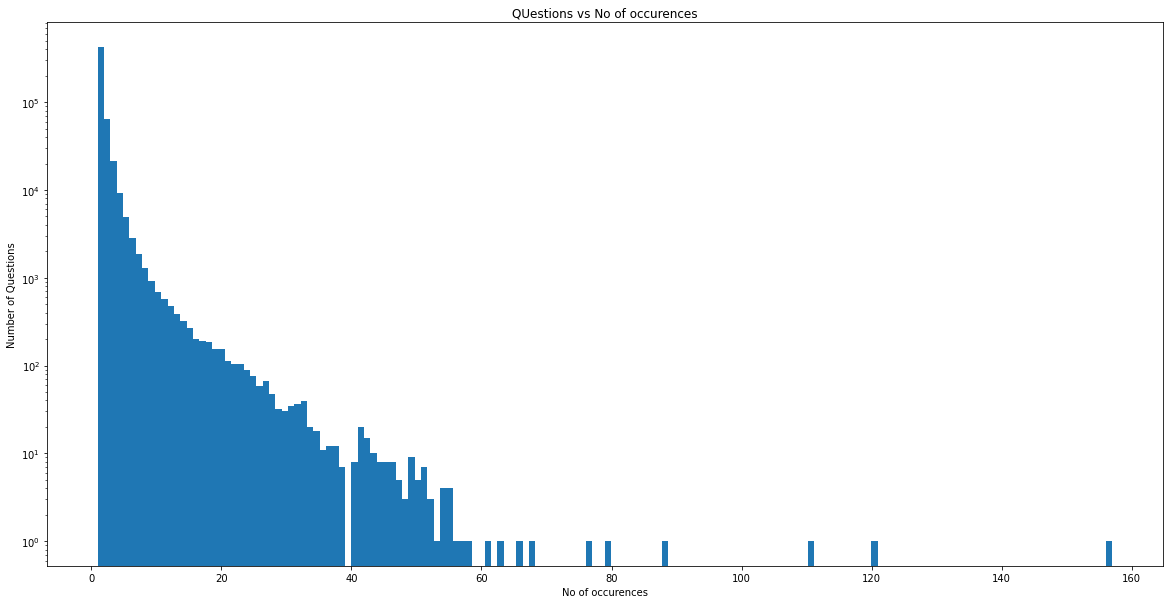

In [16]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy = 'clip')

plt.title('QUestions vs No of occurences')

plt.xlabel('No of occurences')

plt.ylabel('Number of Questions')

print('Max no of times a single qus is repeated {}'.format(max(qids.value_counts())))

*   In terms of questions, everything looks as I would expect here. Most questions only appear a few times, with very few questions appearing several times (and a few questions appearing many times). One question appears more than 157 times.



<b> 3.7. Checking null values

In [17]:
# Checking the null values for rows in dataset and listing out rows having null values.
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


There are 3 rows having nan values in question 1 and question 2 fields.

In [18]:
#Filling the missing null values.

df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2> <b> 4. Feature Extraction before cleaning </b>

Before we create a model, we should take a look at how powerful some features are. Let us now construct a few features like:



*   <b>freq_qid1</b> = Frequency of qid1's
*   <b>freq_qid2</b> = Frequency of qid2's
*   <b>q1len</b> = Length of q1
*   <b>q2len</b> = Length of q2
*   <b>q1_n_words</b> = Number of words in Question 1
*   <b>q2_n_words</b> = Number of words in Question 2
*   <b>word_Common</b> = (Number of common unique words in Question 1 and Question 2)
*   <b>word_Total</b> =(Total num of words in Question 1 + Total num of words in Question 2)
*   <b>word_share</b> = (word_common)/(word_Total)
*   <b>freq_q1+freq_q2</b> = sum total of frequency of qid1 and qid2
*   <b>freq_q1-freq_q2</b> = absolute difference of frequency of qid1 and qid2


















*   Better features give you a lot of flexibility. Even if you choose a less optimal ML algorithm, you will get a good result. Good features provide you with the flexibility of choosing an algorithm; even if you choose a less complex model, you get good accuracy.

*   If you choose good features, then even simple ML algorithms do well.
Better features will lead you to better accuracy. 

*   You should spend more time on features engineering to generate the appropriate features for your dataset. If you derive the best and appropriate features, you have won most of the battle.








In [19]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv('df_fe_without_preprocessing_train.csv', encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len()
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row : len(row.split(' ')))
    df['q2_n_words'] = df['question2'].apply(lambda row : len(row.split(' ')))
    
    def common_word(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
        return 1.0 * len(w1 & w2)
    df['word_common'] = df.apply(common_word, axis=1)
    
    def total_word(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
        return 1.0 * (len(w1) + len(w2))
    df['total_word'] = df.apply(total_word, axis=1)
    
    def word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(word_share, axis=1)
    
    df['freq_q1 + q2'] = df['freq_qid1'] + df['freq_qid2']
    df['freq_q1 - q2'] = abs(df['freq_qid1'] - df['freq_qid2'])
    
    df.to_csv('df_fe_without_preprocessing_train.csv', index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1 + q2,freq_q1 - q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


<b> 4.1. Analysis on the features extracted

In [20]:
print('Minimum length of questions in q1_n_words:', min(df['q1_n_words']))
print('Minimum length of questions in q2_n_words:', min(df['q2_n_words']))
print('Number of questions with minimum length [questions1]', df[df['q1_n_words'] == 1].shape[0])
print('Number of questions with minimum length [questions2]', df[df['q2_n_words'] == 1].shape[0])    

Minimum length of questions in q1_n_words: 1
Minimum length of questions in q2_n_words: 1
Number of questions with minimum length [questions1] 67
Number of questions with minimum length [questions2] 24


<b> 4.1.1. Feature: word_share

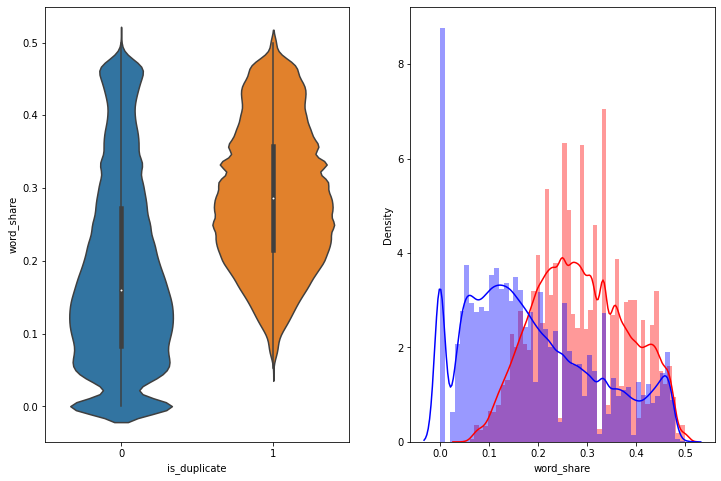

In [21]:
#PLotting violin plot and histogram - PDFs of the class label
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:], label = '1', color = 'red') #questions are duplicate
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:], label = '0', color = 'blue') #questions not duplicate
plt.show()



*   The Common no.of words and avg word share qid1 and qid2 is more when they are duplicate(similar).
*   The distributions for feature <b>word_share</b> have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity



<b> 4.1.2. Feature: word_common

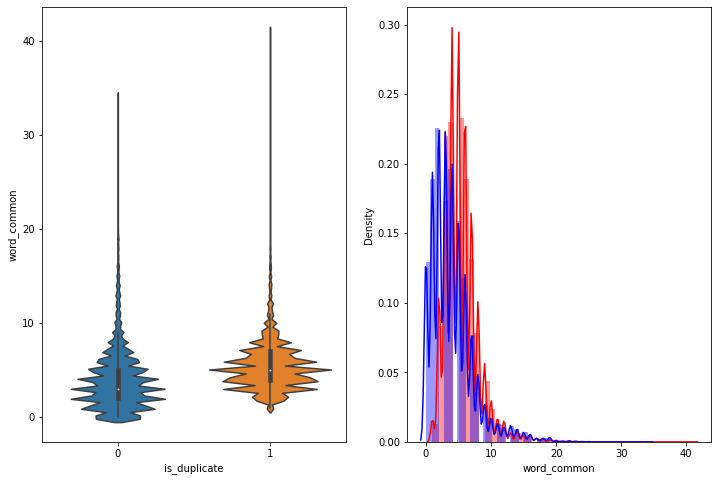

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)

sns.violinplot(x = 'is_duplicate', y = 'word_common', data = df[0:])

plt.subplot(1,2,2)

sns.distplot(df[df['is_duplicate'] == 1.0]['word_common'][0:] , color = 'red', label = "1")
sns.distplot(df[df['is_duplicate'] == 0.0]['word_common'][0:] , color = 'blue', label = "0" )

plt.show()

*   The distributions of the feature word_common for both similar and non-similar are highly overlapping.

*   The plot confirms that there are many common words shared between both similar and non-similar questions.







In [23]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [64]:
df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1 + q2,freq_q1 - q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0


<b> 4.2. Preprocessing of Text</b>

Preprocessing:

*   Removing html tags
*   Removing Punctuations
*   Performing stemming
*   Removing Stopwords
*   Expanding contractions



In [65]:
# To get the results in 4 decemal points

SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [ ]:
    df["question1"] = df["question1"].apply(preprocess)
    df["question2"] = df["question2"].apply(preprocess)
    df.head(3)

In [68]:
df["question1"] = df["question1"].fillna("").apply(preprocess)
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1 + q2,freq_q1 - q2
0,0,1,2,0 what is the step by step guide to in...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,0 what is the step by step guide to in...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,0 what is the step by step guide to in...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0


The above function performs stop word removal process, create tokens, and uses porterstemmer() stemming technique to stem similar tokens from the question sentences to the same roots that are fed as input(x).

This method could be highly effective since we need to capture meaningful insights from the data and as far as NLP is concerned, in the later process we should be able to convert the tokens into vectors/numeric values before feeding it to the model.

Removing unwanted strings like "(,.!#@$&' preserves the information better and clean data with stemmed tokens will be used to train the machine learning model.

<b> 4.3.  Advanced Feature Extraction (NLP and Fuzzy Features)</b>

<b> Definition: </b>

<b> Token:</b> You get a token by splitting sentence a space

<b>Stop_Word :</b> stop words as per NLTK.

<b> Word : </b> A token that is not a stop_word

<b> <u>Features:  </u></b>



*   <b>cwc_min</b> : Ratio of common_word_count to min lenghth of word count of Q1 and Q2
       cwc_min = common_word_count / (min(len(q1_words), len(q2_words))


*   <b>cwc_max</b> : Ratio of common_word_count to max lenghth of word count of Q1 and Q2
    cwc_max = common_word_count / (max(len(q1_words), len(q2_words))


*   <b>csc_min</b> : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2
    csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))


*   <b>csc_max </b>: Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
    csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))


*   <b>ctc_min</b> : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
    ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))


*   <b>ctc_max</b> : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
    ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))


*   <b>last_word_eq</b> : Check if Last word of both questions is equal or not
     last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])


*   <b>first_word_eq</b> : Check if First word of both questions is equal or not   
    first_word_eq = int(q1_tokens[0] == q2_tokens[0])


*   <b>abs_len_diff</b> : Abs. length difference
    abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))


*   <b>mean_len </b>: Average Token Length of both Questions
    mean_len = (len(q1_tokens) + len(q2_tokens))/2


*   <b>longest_substr_ratio</b> : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2
    longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))
    

*   fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


*   fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

*   token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


*   token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/




































In [44]:
df.head(3) # Dataframe df after creating new features as listed above.

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1 + q2,freq_q1 - q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0


In [99]:
def get_token_features(q1, q2):

    ''' This function tokenizes the features as in question1 and question2 from dataframe
        Input:
        - q1: question1
        - q2: question2

        output:
        - returns tokenized features '''

    token_features = [0.0]*10 #doubt
    
    #converting the questions into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    #get non-stop words in questions
    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])
    
    #get stop words in questions
    q1_stops = set([word for word in q1_tokens if word in stop_words])
    q2_stops = set([word for word in q2_tokens if word in stop_words])
    
    #to get common non stopwords in questions
    common_word_count = len(q1_words.intersection(q2_words))
    
    #get common stopwords from question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    #common tokens of both questions
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    #last words of both questions are same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    #first words of both questions are same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    #Difference between length of the tokens
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #avg length of both questions
    token_features[9] = abs(len(q1_tokens) + len(q2_tokens))/2
    
    return token_features

#to get the longest common substring:

def get_longest_substr_ratio(a, b):

    ''' Fetches the longest substring comparing the questions given

        Input:
        - a: question1
        - b: question2

        Output:
        -returns 0 if length is 0
         returns calculated length if 1 '''

    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    ''' Extracts new features from the dataframe df 

        Input:
        -df: dataframe df

        Output:
        -df: Newly extracted dataframe after processing '''

    df['question1'] = df['question1'].fillna('').apply(preprocess)
    df['question2'] = df['question2'].fillna('').apply(preprocess)

    print('token features')
    
    #Merging features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x['question1'], x['question2']), axis = 1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    print('fuzzy features')
    
    df['token_set_ratio'] = df.apply(lambda x: fuzz.token_set_ratio(x['question1'], x['question2']), axis = 1)
    df['token_sort_ratio'] = df.apply(lambda x: fuzz.token_sort_ratio(x['question1'], x['question2']), axis = 1)
    df['fuzz_ratio'] = df.apply(lambda x: fuzz.QRatio(x['question1'], x['question2']), axis = 1)
    df['fuzz_partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio(x['question1'], x['question2']), axis = 1)
    df['longest_substring'] = df.apply(lambda x: get_longest_substr_ratio(x['question1'], x['question2']), axis = 1)
    return df

In [ ]:
!pip install distance # This provides helpers for computing similarities between arbitrary sequences. 
import distance

In [100]:
# Checks for availability of the csv file, in case of unavailabilty, it creates a dataframe storing columns processed above.

if os.path.isfile('nlp_features_train4.csv'):
    df = pd.read_csv("nlp_features_train4.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

Extracting features for train:
token features
fuzzy features


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substring
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [101]:
# Read the nlp_features_train csv file created with new features developed from the existing features.

df1 = pd.read_csv('nlp_features_train.csv',encoding='latin1')
df1.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substring
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [102]:
df_duplicate = df[df['is_duplicate'] == 1]
df_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([df_nonduplicate["question1"], df_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


<b> 4.4. Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']

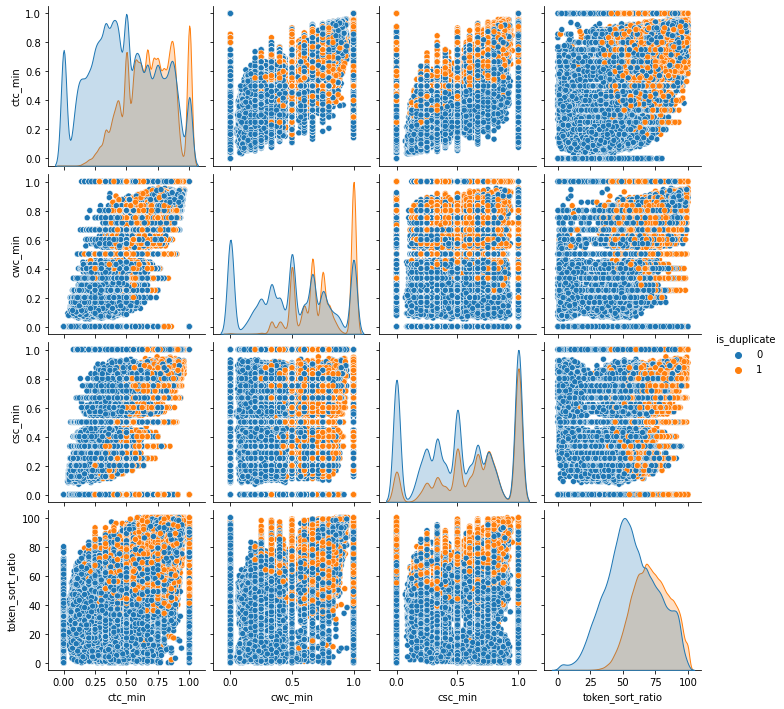

In [103]:
n = df.shape[0]
sns.pairplot(df1[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

The pair plot clearly shows that the new feature <b> "token_sort_ratio"</b> has some linearly separable perception for both duplicate and non-duplicate question pairs and we plot distribution of the same. 

<b> 4.5. Distribution of the token_sort_ratio </b>

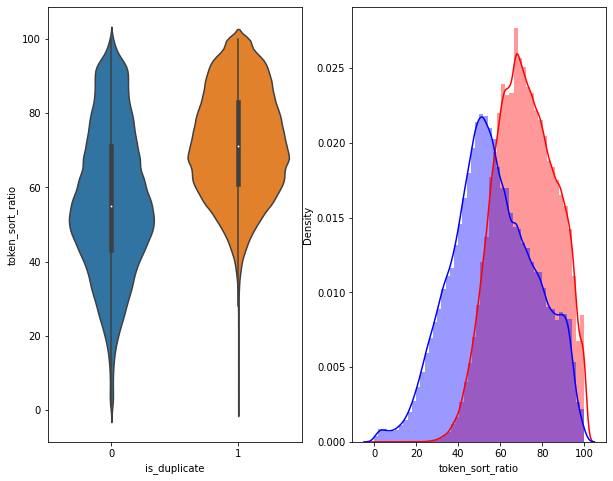

In [104]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df1[0:] , )

plt.subplot(1,2,2)
sns.distplot(df1[df1['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df1[df1['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

We can apply the MinMaxScaler to the NLP dataset directly to normalize the input variables.

We will use the default configuration and scale values to the range 0 and 1. First, a MinMaxScaler instance is defined with default hyperparameters. Once defined, we can call the fit_transform() function and pass it to our dataset to create a transformed version of our dataset.

In [106]:
from sklearn.preprocessing import MinMaxScaler

df_subsampled = df1[0:5000]
X = MinMaxScaler().fit_transform(df_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substring']])
y = df_subsampled['is_duplicate'].values

<b> 4.6. Featurizing text data with tfidf weighted word-vectors </b>

I'm now going to try to improve this feature, by using something called TF-IDF (term-frequency-inverse-document-frequency). This means that we weigh the terms by how uncommon they are, meaning that we care more about rare words existing in both questions than common one. This makes sense, as for example we care more about whether the word "exercise" appears in both than the word "and" - as uncommon words will be more indicative of the content.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
import spacy

In [108]:
df = pd.read_csv("train.csv")

df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [109]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.Here we use a pre-trained GLOVE model which comes free with "Spacy". https://spacy.io/usage/vectors-similarity.
It is trained on Wikipedia and therefore, it is stronger in terms of word semantics.

In [111]:
import spacy
from tqdm import tqdm
import en_core_web_sm

# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)

100%|██████████| 404290/404290 [57:15<00:00, 117.67it/s]


In [112]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|██████████| 404290/404290 [59:21<00:00, 113.50it/s]


In [113]:
print(df.columns)

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_feats_m', 'q2_feats_m'],
      dtype='object')


In [114]:
import os
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [115]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_feats_m,q2_feats_m
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[-6.179506778717041, 37.45073118805885, -67.92...","[-14.616980731487274, 59.75548753142357, -53.2..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[9.236667931079865, -80.37141644954681, -45.78...","[-3.5657422859221697, -16.844570636749268, -13..."


In [116]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)

df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df1.index)

df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [117]:
# Dataframe of NLP features
df1.head(2)

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substring
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [118]:
# Data before preprocessing 
df2.head(2)

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1 + q2,freq_q1 - q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [119]:
# Questions 1 tfidf weighted word2vec
df3_q1.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-6.179507,37.450731,-67.929894,32.224274,143.348826,135.374574,17.865208,54.562352,81.618936,232.909839,27.167002,-6.187220,41.996069,-103.537911,-6.616976,-94.064813,-31.617267,-29.205890,-39.608413,30.163852,67.357976,56.346944,7.606743,20.720049,-56.899175,-41.419606,30.634747,-20.667785,93.049776,-108.506989,134.494691,-69.708587,57.891030,-94.501012,-34.043306,-88.044590,197.875458,-56.918224,-33.153865,-68.587951,...,114.638685,50.816876,-57.381595,106.554903,98.567380,-67.311119,88.728154,48.158799,-12.962363,-108.238607,77.740890,-76.930486,-55.488544,55.403322,-134.602412,15.887729,-14.812700,-43.172916,-71.213891,66.473449,138.864320,-134.555638,11.072384,11.770594,23.349589,-83.244351,-55.722126,-21.893210,8.263763,-14.915859,-71.834689,-60.222858,-22.026407,103.336720,-68.477445,-54.976584,-67.802663,116.269999,60.515897,-12.245916
1,9.236668,-80.371416,-45.785907,78.291656,183.568221,100.894077,74.344804,48.360802,127.297421,112.987302,73.449294,-47.164479,31.560610,-77.927155,-103.803116,-78.503396,11.997354,73.522302,-3.368269,-61.134586,1.137853,-47.250332,-14.747230,-111.214488,-92.936345,-86.908993,26.479862,-125.349442,53.630314,-118.244944,-19.311728,4.184269,37.147654,-32.207492,54.693156,-146.564649,190.351235,-50.185377,-102.660014,-62.070884,...,69.116646,123.042798,2.978409,-52.171842,-77.587376,-43.825259,-2.570918,25.001977,74.528037,55.402768,53.763126,-27.621300,-62.024373,67.296625,-127.672300,5.919581,51.888908,5.646263,-52.011487,-22.036677,150.269148,-19.587007,-46.445237,-12.489538,104.020920,-83.863392,-11.340908,26.339330,16.131961,137.782501,-32.130515,-98.080325,19.113790,-20.507508,-76.981011,82.665075,41.085582,129.377781,115.868467,4.383543
2,97.546829,22.972195,-39.558378,18.723416,56.928620,48.307643,8.719268,36.893737,106.899948,226.283080,-5.023025,-68.019793,-52.865684,-112.794187,49.411453,4.386397,-23.508985,3.867846,-19.287308,-52.332033,59.900114,102.718565,-6.070379,-47.957186,-51.316635,26.235306,-71.297170,-82.694041,61.166595,-59.661620,85.192997,95.725261,-9.786940,-44.572019,-26.737537,-8.913334,67.037574,-85.818559,-137.332815,-58.704829,...,126.969506,32.991508,11.751381,32.921630,127.876085,-117.452091,-53.697893,116.449840,-7.114503,-28.417017,22.236688,-95.365500,-13.684289,67.952175,-19.670386,0.049363,63.119457,21.524016,-36.342319,7.531785,101.659882,-90.213289,-11.944407,-20.185547,16.732628,9.608647,-77.976104,77.923826,59.257286,-78.643996,-66.835015,87.592131,4.032431,56.851709,-43.625410,-57.580963,-50.425829,78.591986,105.714348,-33.304161
3,57.586999,-22.017088,-4.599304,-88.939273,-4.732172,-54.209038,74.614942,106.533731,15.520623,39.009711,-101.132338,-12.242595,148.377723,101.759336,61.735411,147.720951,-76.666564,-61.303286,-63.827246,8.319557,-32.426865,-6.724337,-28.032162,-32.440859,25.425998,125.724761,5.593011,-111.110888,-10.119862,-23.430039,-38.038687,-19.025249,38.910990,-52.249356,-13.859811,-56.759533,19.452093,-96.299227,-86.240144,18.250540,...,99.160310,22.281756,-18.003228,20.443845,17.556030,-152.605936,-27.253293,2.113273,9.557493,-13.790257,-97.305417,11.291192,71.311880,20.816198,-23.316110,-17.823973,48.085230,30.902770,-5.960159,-99.039773,125.188415,-17.051089,-43.028228,79.045821,37.998520,-86.332762,-23.401571,55.163438,-13.930802,-25.005486,28.362956,41.981221,-11.204984,16.833434,-36.372471,8.927573,-64.553194,95.054238,-34.157566,70.821932


In [120]:
# Questions 2 tfidf weighted word2vec
df3_q2.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-14.616981,59.755488,-53.263745,19.514497,113.916473,101.657056,8.561499,66.232769,32.888127,210.812733,-14.521656,5.732026,40.648458,-95.787979,-1.157125,-66.563451,-31.051373,-17.968147,-30.063745,32.889709,65.430540,54.742656,1.756501,27.786168,-46.373962,-25.822312,51.231668,-20.655695,98.152685,-96.048390,126.935466,-28.066691,82.523253,-91.751655,-24.696691,-67.690101,171.840663,-62.797236,-22.777055,-60.322768,...,120.843786,26.592192,-50.285062,114.594113,100.273874,-72.797047,85.467161,42.393031,-18.239859,-103.664753,68.317974,-46.449020,-60.184247,47.269530,-113.987847,10.320980,0.135103,-29.869163,-78.649177,77.262293,131.287160,-123.969027,20.822789,20.718112,38.093118,-85.086696,-61.891319,3.915410,-58.229361,-49.735812,-72.266625,-37.072086,-31.142730,94.064854,-45.053242,-34.155221,-76.548099,99.282776,50.791731,-17.566246
1,-3.565742,-16.844571,-130.911785,0.320254,79.350278,23.562028,79.124551,84.119839,128.684135,279.539877,51.329233,-47.977027,124.322700,-106.766716,-35.756386,-119.277429,21.692362,79.320570,-30.874480,-86.451965,-75.311001,-10.504030,-54.459205,-82.283126,-122.537507,-23.897150,38.062149,-120.668866,96.555255,-172.800629,71.174992,52.399280,-3.790546,-88.446559,-1.359644,-169.229485,242.162139,-106.348765,-118.454241,-81.356276,...,190.348300,114.510458,-79.321841,-65.284250,-69.147191,-111.427223,18.650104,15.329342,43.115542,31.039919,49.603525,-26.932295,-54.213027,98.597791,-72.848590,87.272756,2.563240,-12.326506,-50.862417,19.058227,180.085690,-79.230389,-49.612403,-2.875509,12.640813,-205.569995,-46.432224,86.927369,2.640828,-2.350201,6.193171,-65.084229,-15.654534,-3.475828,26.999802,170.172613,-57.038953,194.269546,128.207803,55.490061
2,156.833630,59.991896,-8.414311,29.251426,133.680218,112.457566,89.849781,21.613022,24.331766,171.114490,-104.683288,-27.202060,-45.827002,-96.844532,-12.986917,43.818585,20.793440,15.393396,0.015373,-28.024086,-12.633978,11.869804,-52.478160,-3.826736,8.331102,21.353006,-36.579113,-14.109747,43.868416,-107.133660,125.654210,-0.800086,39.060021,-50.904144,37.683092,-78.781466,122.383833,-67.524980,-107.706957,-19.469239,...,13.483461,-63.411094,40.414527,37.971310,110.463600,-76.722634,-13.193802,38.792827,-49.570232,-142.726638,12.245693,-54.343166,-60.057482,102.482628,3.656340,-21.436032,37.960952,-25.729971,23.332562,9.404027,153.432356,-76.191487,-20.813622,-27.269100,11.735237,-20.692981,-47.580536,42.119569,49.291951,-59.756461,-26.185226,-19.283218,75.602438,24.144027,-91.874398,-178.454113,-91.471482,19.922719,21.266690,49.574858
3,41.472439,56.717317,31.530616,-5.520164,33.454800,79.596179,15.508996,40.042066,21.094017,101.998116,-70.692718,-62.091010,-21.603829,-52.963033,-6.126429,23.129693,-39.828342,-7.557531,10.800786,12.595844,32.663719,-36.700902,-20.552382,-7.180278,-32.160210,28.720635,-42.108100,-63.517539,36.148466,3.026077,-8.988254,64.167554,33.157036,-21.770225,-14.935299,0.127441,61.023365,-50.604968,-81.644456,-43.092263,...,42.726956,10.111637,15.897465,30.342897,42.910006,-101.291523,30.792590,-33.975097,-68.384557,-21.621304,20.336738,18.368145,-2.009289,46.823555,14.814505,84.138001,59.194556,-36.240492,30.679147,-0.383225,48.515156,-53.941062,-25.314894,-6.555996,-48.458986,-34.730500,24.471891,81.124125,-26.392446,-64.587732,-17.779019,30.152297,49.300137,27.783795,25.937188,-32.107076,-3.817634,-14.231000,4.772115,7.711628


In [121]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 96
Number of features in question2 w2v  dataframe : 96
Number of features in final dataframe  : 221


In [122]:
# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1  = df1.merge(df2, on='id',how='left')
    df2  = df3_q1.merge(df3_q2, on='id',how='left')
    result  = df1.merge(df2, on='id',how='left')
    result.to_csv('final_features.csv')

<b> 4.7. Implementation: </b>

Well, we have finally reached the end of data preprocessing and preparation. There has been some analysis on which existing features and additional new features generated might contribute to the model's betterment. The solid reason to have these many features is basically to train the model with all possible parameters that will further increase the efficiency in producing better results. 

Revisiting our objective, we need to build a model that predicts the duplicate questions that exist in the quasi-forum quora for which we have developed many useful features and normalized the same to feed our ML model.

I try to built 3 different models, since we are predicting a given input question is duplicate or not, we will proceed with binary classification supervised learning model. 

I decided to compare the performance of a logistic regressor model with a SVM model and XGBoost model. Reason why I chose this flow is because to focus on prioritising the interpretability of the model. 

Since we intend to analyse the feature importance to determine the duplication, a logistic regressor would provide some interpretability to analyse.

Meanwhile, I also selected SVM and XGBoost as an alternate classifier over a logistic regressor is to have an improvement/betterment in classification, in order to drive towards high accuracy while training a model.

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#!pip3 install StratifiedKFold
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [167]:
df5 = pd.read_csv('final_features.csv')
df5.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substring,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1 + q2,freq_q1 - q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,-6.179507,37.450731,-67.929894,32.224274,143.348826,135.374574,17.865208,54.562352,81.618936,232.909839,27.167002,...,120.843786,26.592192,-50.285062,114.594113,100.273874,-72.797047,85.467161,42.393031,-18.239859,-103.664753,68.317974,-46.449020,-60.184247,47.269530,-113.987847,10.320980,0.135103,-29.869163,-78.649177,77.262293,131.287160,-123.969027,20.822789,20.718112,38.093118,-85.086696,-61.891319,3.915410,-58.229361,-49.735812,-72.266625,-37.072086,-31.142730,94.064854,-45.053242,-34.155221,-76.548099,99.282776,50.791731,-17.566246
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,9.236668,-80.371416,-45.785907,78.291656,183.568221,100.894077,74.344804,48.360802,127.297421,112.987302,73.449294,...,190.348300,114.510458,-79.321841,-65.284250,-69.147191,-111.427223,18.650104,15.329342,43.115542,31.039919,49.603525,-26.932295,-54.213027,98.597791,-72.848590,87.272756,2.563240,-12.326506,-50.862417,19.058227,180.085690,-79.230389,-49.612403,-2.875509,12.640813,-205.569995,-46.432224,86.927369,2.640828,-2.350201,6.193171,-65.084229,-15.654534,-3.475828,26.999802,170.172613,-57.038953,194.269546,128.207803,55.490061
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,97.546829,22.972195,-39.558378,18.723416,56.928620,48.307643,8.719268,36.893737,106.899948,226.283080,-5.023025,...,13.483461,-63.411094,40.414527,37.971310,110.463600,-76.722634,-13.193802,38.792827,-49.570232,-142.726638,12.245693,-54.343166,-60.057482,102.482628,3.656340,-21.436032,37.960952,-25.729971,23.332562,9.404027,153.432356,-76.191487,-20.813622,-27.269100,11.735237,-20.692981,-47.580536,42.119569,49.291951,-59.756461,-26.185226,-19.283218,75.602438,24.144027,-91.874398,-178.454113,-91.471482,19.922719,21.266690,49.574858
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,57.586999,-22.017088,-4.599304,-88.939273,-4.732172,-54.209038,74.614942,106.533731,15.520623,39.009711,-101.132338,...,42.726956,10.111637,15.897465,30.342897,42.910006,-101.291523,30.792590,-33.975097,-68.384557,-21.621304,20.336738,18.368145,-2.009289,46.823555,14.814505,84.138001,59.194556,-36.240492,30.679147,-0.383225,48.515156,-53.941062,-25.314894,-6.555996,-48.458986,-34.730500,24.471891,81.124125,-26.392446,-64.587732,-17.779019,30.152297,49.300137,27.783795,25.937188,-32.107076,-3.817634,-14.231000,4.772115,7.711628
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,83.185784,-40.506985,-83.403923,-52.648658,79.074884,-19.038248,53.728722,97.648612,160.555822,290.541356,48.316273,...,71.499781,18.965061,-51.951589,143.003627,80.452054,-68.287474,57.275702,36.489817,53.253386,-27.336291,47.700427,-49.834492,-73.123519,55.578373,16.308465,-11.157177,-36.426174,-22.066498,-44.440222,57.068454,105.921980,-47.922645,3.147361,-10.025005,-1.506463,-60.390457,-29.808763,14.704287,-36.376515,-45.781378,36.089472,47.193216,-49.969586,44.796028,39.740803,-33.763309,-98.282341,22.118795,68.802072,21.025373


In [168]:
df6 = df5.sample(n=100001,replace=False)

In [169]:
df6.shape

(100001, 221)

<b> 5. Machine Learning Models</b>

5.1. Reading data from file and storing into sql table.

In [127]:
if not os.path.isfile('train1.db'):
    disk_engine = create_engine('sqlite:///train1.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows
360000 rows
540000 rows


In [131]:
def create_connection(db_file): # http://www.sqlitetutorial.net/sqlite-python/create-tables/
    """ create a database connection to the SQLite database
        specified by db_file

        Input:
        db_file: database file

        Output:
        return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables)
    return(len(tables))

In [132]:
import sqlite3
read_db = 'train1.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
[('data',)]


In [160]:
# try to sample data according to the computing power you have
import sqlite3
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [ ]:
df6 = df5.sample(n=100001,replace=False)

In [171]:
# remove the first row 
df6.drop(df6.index[0], inplace=True)
y_true = df6['is_duplicate']
df6.drop(['Unnamed: 0', 'id', 'is_duplicate'], axis=1, inplace=True)

In [172]:
cols = list(df6.columns)
df6 = pd.DataFrame(np.array(df6.values,dtype=np.float64),columns=cols)

In [173]:
y_true = list(map(int, y_true.values))

<b> <h3> 5.1. Model Implementation & Refinement: </h3> </b>

Bascially, I'm not separately performing implementation and refinement. The block of codes writen below will have both model implementation and refinement of hyper-parameter tuning done in search of best alpha value with low log loss. 

<b> Models Used</b>:

1. <b> Random model:</b> To depict a picture of how a log loss would be while running them on a random model.

2. <b>Logistic Regression:</b> Performs binary classification in our scenario and have effectively used the refinement part of searching best alpha value with low log loss value.

3. <b>SVM:</b> This can be applied to both classification and regression problems but still highly used for classification problems. Tried out to check how this works with our data.

4. <b> XGBoost:</b> Highly suggested model and recently dominating machine learning algorithm. Used it effectively out of curiosity and for comparison of how its log loss value will look like compared to the other models.

<b> Random train test split( 70:30) </b> 
 
 I split the data into training and test sets. 

In [174]:
# Splitting Train and test data for training and validation of model
X_train,X_test, y_train, y_test = train_test_split(df6, y_true, stratify=y_true, test_size=0.3)

In [175]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 218)
Number of data points in test data : (30000, 218)


In [176]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6325857142857143 Class 1:  0.3674142857142857
---------- Distribution of output variable in test data ----------
Class 0:  0.36743333333333333 Class 1:  0.36743333333333333


*   The output variable distribution of class 0 and class 1 is done eqaully with respect to the test data which eliminates the biased nature with prediction.

*   In case of the train data, I think training the model with more data points of class 0 might affect the model's performance to certain extent. 



In this function, I define confusion matrix that is used to visualize important predictive analytics like recall, specificity, accuracy, and precision. Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

<b> Confusion Matrix:</b>

Precision Matrix - Column sum equals 1. Diagnol values are the values of precision matrix.

Recall - Row sums to 1. Diagnol values are the recall values of class 1 and class 2.

SInce more points belonging to class 1 we have more value categorized for class 1 than 2.

<b> Recall or Sensitivity or TPR (True Positive Rate):</b>

According to sklearn documentation, the recall is intuitively the ability of the classifier to find all the positive samples.

Number of items correctly identified as positive out of total true positives: True Positives /(True Positives +False Negatives)

<b>Precision:</b>

According to the sklearn documentation, it is intuitively the ability of the classifier not to label as positive a sample that is negative.

Number of items correctly identified as positive out of total items identified as positive: True Positives /(True Positives + False Positives)

In [177]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<b> 5.3. Building a random model (Finding worst-case log-loss)

Log loss on Test Data using Random Model 0.8874285127439074


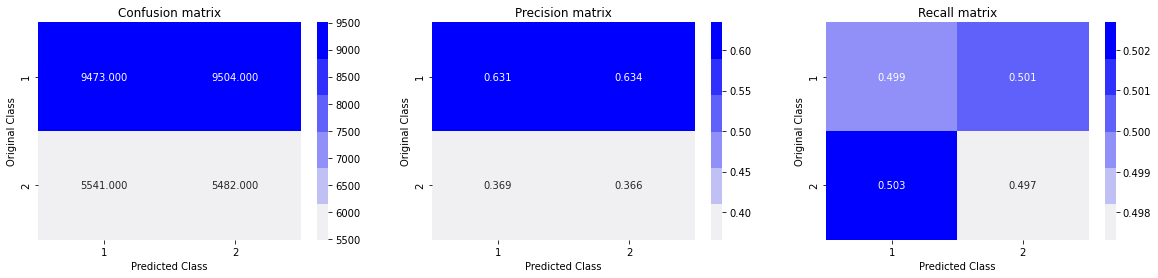

In [178]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

A note on model evaluation and validation; I decided to implement log loss value as the model evaluation metric. This score provides a better sense of model performance compared to purely accuracy as it takes both actual and predicted values in the calculation.

When compute log loss on random model, it will give us the dumb log loss which we can consider as the worst pecentage for a model. Any model which gives a result ranging between 0 and 0.88 can be considered as a moderate model and closer to 0 the better it is.

In [ ]:
X_train.isnull()

<b> 5.4. Logistic Regression with hyperparameter tuning</b>

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable

For values of alpha =  1e-05 The log loss is: 0.48377850280284357
For values of alpha =  0.0001 The log loss is: 0.4598751552356344
For values of alpha =  0.001 The log loss is: 0.45898548480231405
For values of alpha =  0.01 The log loss is: 0.44706057929129295
For values of alpha =  0.1 The log loss is: 0.4552305059731482
For values of alpha =  1 The log loss is: 0.48566484573956903
For values of alpha =  10 The log loss is: 0.5272588752486801


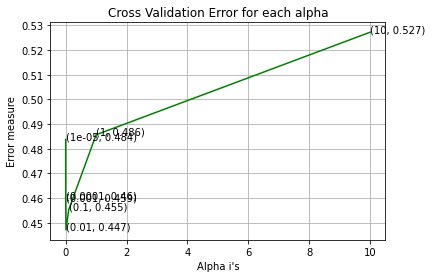

For values of best alpha =  0.01 The train log loss is: 0.4463925270186181
For values of best alpha =  0.01 The test log loss is: 0.44706057929129295
Total number of data points : 30000


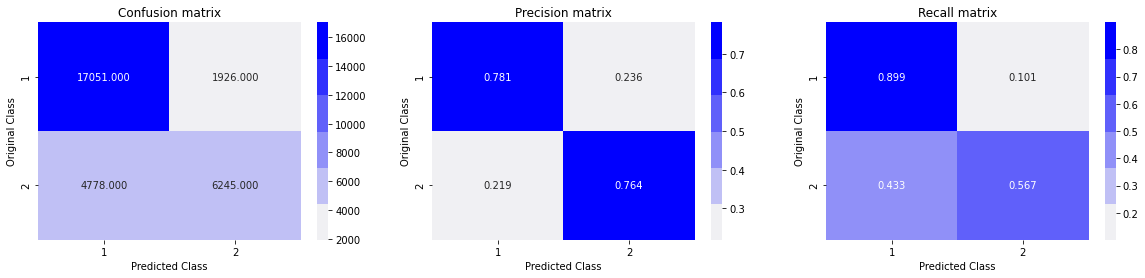

In [180]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

Logistic regression performs quite well on our dataset in order to solve our classification problem. We here have used hyper-parameter tuning in order to identify the best alpha values which produces minimal log loss error value. 

On clear visualization of the graph, it is quiet convincing that the log loss values drop drastically to an alpha=0.01 where the log loss(0.44) seems to be minimal. 

Checking the precision and recall factors/metrics, it seems to be fairly good enough. The True Positives predictions are higher in both precision and recall graph.

We will further use other models in order to check whether we can reduce this log loss value. 

<b> 5.5. Linear SVM with hyperparameter tuning </b> 

SGD Classifier is a Linear classifiers (SVM, logistic regression, a.o.) with SGD training. 

For values of alpha =  1e-05 The log loss is: 0.6575755131593688
For values of alpha =  0.0001 The log loss is: 0.6575755131593688
For values of alpha =  0.001 The log loss is: 0.5144472087123
For values of alpha =  0.01 The log loss is: 0.4804307733422591
For values of alpha =  0.1 The log loss is: 0.5561828550096296
For values of alpha =  1 The log loss is: 0.6082678482712579
For values of alpha =  10 The log loss is: 0.6248646820216995


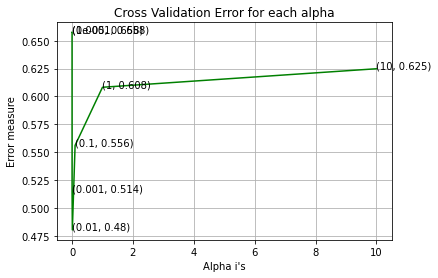

For values of best alpha =  0.01 The train log loss is: 0.4827745373884499
For values of best alpha =  0.01 The test log loss is: 0.4804307733422591
Total number of data points : 30000


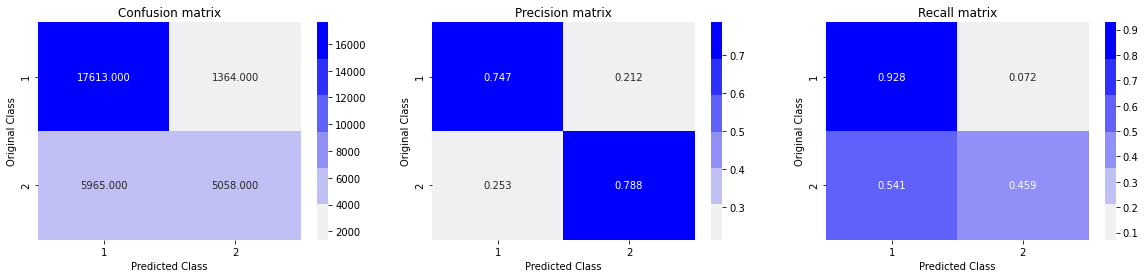

In [181]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# Read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# Default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<b> Observation: </b> 
 
 *   Best Alpha value of 0.01 which results in merely close train and test log loss(0.48).

*   Precision seems to have more than 70% of correclty classified True Positives and True Negatives.


We will try to build a better model with low log loss, We try out XGBoost algorithm as shown below.

In [182]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684905	valid-logloss:0.684858
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61462	valid-logloss:0.614179
[20]	train-logloss:0.56384	valid-logloss:0.563128
[30]	train-logloss:0.525226	valid-logloss:0.524437
[40]	train-logloss:0.495437	valid-logloss:0.494663
[50]	train-logloss:0.472313	valid-logloss:0.471548
[60]	train-logloss:0.453589	valid-logloss:0.452771
[70]	train-logloss:0.438678	valid-logloss:0.437788
[80]	train-logloss:0.426629	valid-logloss:0.425834
[90]	train-logloss:0.417009	valid-logloss:0.416268
[100]	train-logloss:0.408915	valid-logloss:0.408199
[110]	train-logloss:0.402145	valid-logloss:0.401491
[120]	train-logloss:0.396477	valid-logloss:0.395909
[130]	train-logloss:0.391806	valid-logloss:0.391297
[140]	train-logloss:0.387549	valid-logloss:0.387217
[150]	train-logloss:0.384063	valid-logloss:0.38392
[160]	train-logloss:0.381074	va

Total number of data points : 30000


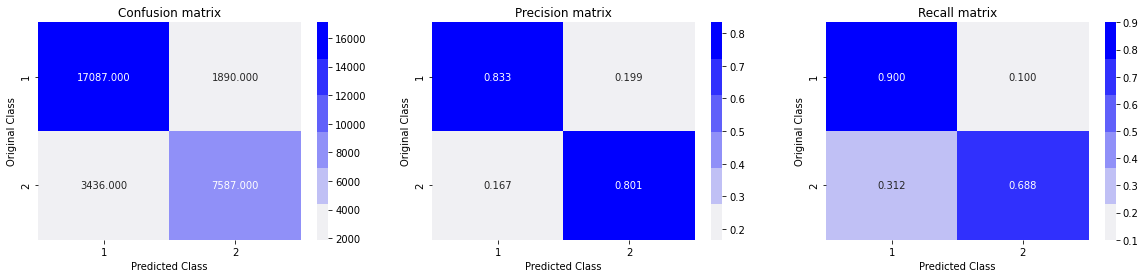

In [183]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

*   The XGBoost seems to perform much better than other models and also resulting in a very low log loss value compared with Logistic regressor and SVM models.
*   Low the log loss, better the model performance and also validating the confusion matrix, both true positive and true negative classification were more than 80% with respect to precision and recall matrix which tells us that the model is at its best in classifying the data points.

 



In [1]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ['Dataset Size', 'Model Name', 'Tokenizer','Hyperparameter Tunning', 'Test Log Loss']
ptable.add_row(["~ 100K","Random","TFIDF Weighted W2V","NA","0.88"])
ptable.add_row(["~ 100K","Logistic Regression","TFIDF Weighted W2V","Done","0.44"])
ptable.add_row(["~ 100K","Linear SVM","TFIDF Weighted W2V","Done","0.48"])
ptable.add_row(["~ 100K","XGBoost","TFIDF Weighted W2V","NA","0.35"])
print(ptable)

+--------------------------------------------------------------------------------------------------+
|                                        Model Comparision                                         |
+--------------+---------------------+--------------------+------------------------+---------------+
| Dataset Size |      Model Name     |     Tokenizer      | Hyperparameter Tunning | Test Log Loss |
+--------------+---------------------+--------------------+------------------------+---------------+
|    ~ 100K    |        Random       | TFIDF Weighted W2V |           NA           |      0.88     |
|    ~ 100K    | Logistic Regression | TFIDF Weighted W2V |          Done          |      0.44     |
|    ~ 100K    |      Linear SVM     | TFIDF Weighted W2V |          Done          |      0.48     |
|    ~ 100K    |       XGBoost       | TFIDF Weighted W2V |           NA           |      0.35     |
+--------------+---------------------+--------------------+------------------------+-------

 *   On high dimension dataset 'XGBoost' does not perform well, but it does performwell in above dataset because of low dimension of 221. Whereas 'Logistic Regression' and 'Linear SVM' performs moderately on low dimension data.

*   The implementation of XGBoost offers several advanced features for model tuning, computing environments and algorithm enhancement. It is capable of performing the three main forms of gradient boosting (Gradient Boosting (GB), Stochastic GB and Regularized GB) and it is robust enough to support fine tuning and addition of regularization parameters.

<b> <h3>  Conclusion: </h3> </b>

Overall, I chose this challenging project because that this data preparation has so many NLP techniques involved right from tokenization, text based feature extraction to converting texts into numerics for model creation, and always this domain seems to appear as the future advancement.

<b> Objective: </b> 

*   Identify the given input question is duplicate/similar in the quasi-forum quora. 

<b> a. Reflection: </b>

<b> a.i.Question1 findings: </b> 

As we discussed in the objective part, the goal is to build a model that classifies the given input as existsing qus or new qus in the forum.

<b> Data Analysis: </b> 

Initially, we explored the given data from kaggle to have an outlook on the data distribution. 

*   Overview of 1,50,000 duplicate question and 2,50,000 non-duplicates that exist.

*   Most Number of times a qus repeated: 157.

*   No.of unique qus in the forum: 537933

*   Number of unique questions that appear more than one time: 111780 (20%)

Since we didn't have much details/info to build a model apart from basic exploration, that's where we performed feature extraction. 

<b> Feature Extraction: </b>

This technique fetched us some new features that we created from the given quora question pair. Analysis on these features lead us to some of the important aspects that could possibly influence our model prediction results.

*   cwc_min
*   cwc_max
*   csc_min
*   csc_max
*   ctc_min
*   ctc_max
*   last_word_eq
*   first_word_eq
*   abs_len_diff
*   mean_len etc.

<b> Important Feature: </b> "token_sort_ratio" had some linearly separable characterstics that was evident in the distribution plotted.





<b> Model creation: </b>

For two out of three models, we have used the same technique of implementing SGD() classifier with hyper-parameter tuning to estimate the best alpha value resulting in low log loss error.

<u> Models Used:</u>

<u> Logistic Regression on 100K data with hyper parameter tuning:</u> 

1. Best alpha: 0.01

2. Log-loss: 0.44

<u>SVM on 100K data with hyper parameter tuning: </u>

1. Best alpha: 0.01

2. Log-loss: 0.48

<u>XGBoost on 100K data with no hyper parameter tuning:</u>

1. Best alpha: 0.02

2. Log-loss: 0.35

As an end result, XGBoost algorithm resulted with significantly low log loss value while classifying the inputs given.

The reason why many tuning parameters weren't used is because of time constraints since it processes for a very long time.


<b> New learnings: </b>


The interesting technique I have gone through is the <b> fuzzywuzzy  </b> library with which we have build so many features for model prediction. Reasons why this was engaging as part of the analysis are:

*   It was used to obtain similairty ratio between two sequences and return similar percentage. 

*   Library allowed us to perform feature extraction to generate features like token_sort_ratio, fuzz_ratio, fuzz_partial_ratio and token_set_ratio. 

Without this library, there is a possibilty that there existed lines of code to achieve the desired features.





<b> b. Potential Improvement: </b>

When analysing and building the machine learning models to answer the problem statement, reflections on my main challenges and findings are as follows:


*   Tuning a model by modifying its parameters.

*   Looping over a list of alpha values which is time consuming process delaying the results that could have been improved via some advance dynamic programming.

*   Fetching new features in the feature extraction process was highly challenging and still could have been developed/analyzed better in order to grab those highly correlated feature alone for model development.

As we know that, on high dimension dataset 'XGBoost' does not perform well, but it does perform well in above dataset because of low dimension of 221. Whereas 'Logistic Regression' and 'Linear SVM' performs moderately on low dimension data.

To test this, we will have to perform 'Logistic Regression' and 'Linear SVM' on complete ~400K dataset, and we should get better results as compared to above models.





<b> Finally for this capestone project, we conclude that on low dimension data,we will use 'XGBoost' model and for high dimension data we will use either 'Linear SVM' or 'Logistic Regression'